In [8]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image, ImageDraw

In [38]:
# img = cv2.imread('img.png')
img = Image.open('img.png')

In [39]:
type(img)

PIL.PngImagePlugin.PngImageFile

In [46]:
dir(img)

['_Image__transformer',
 '_PngImageFile__frame',
 '_PngImageFile__idat',
 '_PngImageFile__prepare_idat',
 '__annotations__',
 '__array_interface__',
 '__class__',
 '__copy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_close_exclusive_fp_after_loading',
 '_close_fp',
 '_copy',
 '_crop',
 '_dump',
 '_ensure_mutable',
 '_exclusive_fp',
 '_exif',
 '_expand',
 '_fp',
 '_get_safe_box',
 '_getexif',
 '_getxmp',
 '_min_frame',
 '_mode',
 '_new',
 '_open',
 '_reload_exif',
 '_repr_image',
 '_repr_jpeg_',
 '_repr_png_',
 '_repr_pretty_',
 '_seek',
 '_seek_check',
 '_size',
 '_text',
 'alpha_composite',
 'apply_transparency',

In [48]:
def add_white_stroke(image_path, stroke_width):
    # Open the image and convert to RGBA
    img = Image.open(image_path).convert("RGBA")
    
    # Convert image to numpy array
    img_np = np.array(img)
    
    # Extract the alpha channel
    alpha = img_np[:, :, 3]
    
    # Create a binary mask where the object is white and the background is black
    mask = cv2.threshold(alpha, 0, 255, cv2.THRESH_BINARY)[1]
    
    # Find contours (edges) of the object
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Create an empty image for the stroke
    stroke_img = Image.new("RGBA", img.size, (255, 255, 255, 0))
    stroke_draw = ImageDraw.Draw(stroke_img)
    
    # Draw the contours with a white stroke
    for contour in contours:
        # Offset the contour points by half the stroke width to center the stroke
        offset_contour = [(point[0][0] + stroke_width // 2, point[0][1] + stroke_width // 2) for point in contour]
        # Draw the stroke by expanding the contour
        stroke_draw.line(offset_contour, fill=(255, 255, 255, 255), width=stroke_width)
    
    # Composite the original image with the stroke
    combined = Image.alpha_composite(stroke_img, img)
    
    return combined

# Usage
image_path = 'img.png'
stroke_width = 10  # Stroke width in pixels

stroked_image = add_white_stroke(image_path, stroke_width)
stroked_image.show()  # Display the image with the stroke
# stroked_image.save('stroked_object_image.png')  # Save the image with the stroke


In [21]:
help(plt.imshow)

Help on function imshow in module matplotlib.pyplot:

imshow(X: 'ArrayLike | PIL.Image.Image', cmap: 'str | Colormap | None' = None, norm: 'str | Normalize | None' = None, *, aspect: "Literal['equal', 'auto'] | float | None" = None, interpolation: 'str | None' = None, alpha: 'float | ArrayLike | None' = None, vmin: 'float | None' = None, vmax: 'float | None' = None, origin: "Literal['upper', 'lower'] | None" = None, extent: 'tuple[float, float, float, float] | None' = None, interpolation_stage: "Literal['data', 'rgba'] | None" = None, filternorm: 'bool' = True, filterrad: 'float' = 4.0, resample: 'bool | None' = None, url: 'str | None' = None, data=None, **kwargs) -> 'AxesImage'
    Display data as an image, i.e., on a 2D regular raster.

    The input may either be actual RGB(A) data, or 2D scalar data, which
    will be rendered as a pseudocolor image. For displaying a grayscale
    image, set up the colormapping using the parameters
    ``cmap='gray', vmin=0, vmax=255``.

    The nu

In [19]:
def add_object_outline(image_path, outline_color, outline_width):
    # Open the image and convert to RGBA
    img = Image.open(image_path).convert("RGBA")
    
    # Convert image to numpy array
    img_np = np.array(img)
    
    # Convert the image to grayscale
    gray = cv2.cvtColor(img_np, cv2.COLOR_RGBA2GRAY)
    
    # Use Canny edge detection to find edges
    edges = cv2.Canny(gray, threshold1=30, threshold2=100)
    
    # Dilate the edges to make them thicker
    edges_dilated = cv2.dilate(edges, np.ones((outline_width, outline_width), np.uint8))
    
    # Create an empty image with the same size and RGBA channels
    outline_img = Image.new("RGBA", img.size, (0, 0, 0, 0))
    
    # Draw the outline on the empty image
    outline_draw = ImageDraw.Draw(outline_img)
    for y in range(edges_dilated.shape[0]):
        for x in range(edges_dilated.shape[1]):
            if edges_dilated[y, x] != 0:
                outline_draw.point((x, y), fill=outline_color)
    
    # Composite the original image with the outline
    combined = Image.alpha_composite(outline_img, img)
    
    return combined

In [13]:
# Usage
image_path = 'img.png'
outline_color = (255, 0, 0, 255)  # Red outline
outline_width = 50  # Outline width in pixels

outlined_image = add_object_outline(image_path, outline_color, outline_width)
outlined_image.show()  # Display the image with the outline
# outlined_image.save('outlined_object_image.png')  # Save the image with the outline


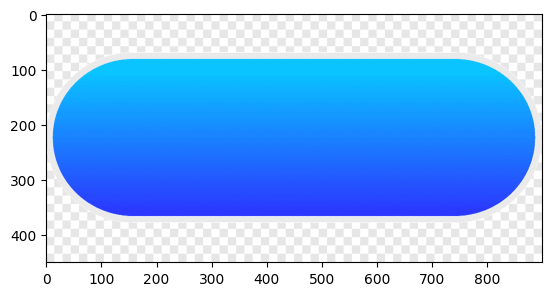

In [7]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))